In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def adjust_contrast_brightness(image, contrast=1.0, brightness=0):
    """
    Adjust contrast and brightness of an image using the formula:
    new_pixel = contrast * original_pixel + brightness

    Parameters:
    image: Input image (uint8)
    contrast: Contrast control factor (1.0 means no change)
        - contrast > 1.0 increases contrast
        - contrast < 1.0 decreases contrast
    brightness: Brightness control value (0 means no change)
        - brightness > 0 increases brightness
        - brightness < 0 decreases brightness

    Returns:
    adjusted: Contrast and brightness adjusted image
    """
    # Convert to float for calculations
    float_img = image.astype(float)

    # Apply contrast and brightness adjustment
    adjusted = contrast * float_img + brightness

    # Clip values to valid range [0, 255]
    adjusted = np.clip(adjusted, 0, 255)

    # Convert back to uint8
    return adjusted.astype(np.uint8)

def create_demo_image():
    """
    Create a demo image with different intensity regions
    """
    image = np.zeros((200, 400), dtype=np.uint8)

    # Add gradient
    for i in range(400):
        image[:, i] = int((i/400) * 255)

    # Add some patterns
    for i in range(0, 200, 20):
        image[i:i+10, :] = 255 - image[i:i+10, :]

    return image

def show_adjustments(image):
    """
    Show effects of different contrast and brightness settings
    """
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(331)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Different contrast values
    contrasts = [0.5, 1.0, 2.0]
    brightness = 0
    for i, contrast in enumerate(contrasts):
        adjusted = adjust_contrast_brightness(image, contrast, brightness)
        plt.subplot(332 + i)
        plt.imshow(adjusted, cmap='gray')
        plt.title(f'Contrast: {contrast}\nBrightness: {brightness}')
        plt.axis('off')

    # Different brightness values
    contrast = 1.0
    brightnesses = [-50, 0, 50]
    for i, brightness in enumerate(brightnesses):
        adjusted = adjust_contrast_brightness(image, contrast, brightness)
        plt.subplot(335 + i)
        plt.imshow(adjusted, cmap='gray')
        plt.title(f'Contrast: {contrast}\nBrightness: {brightness}')
        plt.axis('off')

    # Combined adjustments
    combinations = [(1.5, 30), (0.7, -20), (2.0, -40)]
    for i, (contrast, brightness) in enumerate(combinations):
        adjusted = adjust_contrast_brightness(image, contrast, brightness)
        plt.subplot(338 + i)
        plt.imshow(adjusted, cmap='gray')
        plt.title(f'Contrast: {contrast}\nBrightness: {brightness}')
        plt.axis('off')

    plt.tight_layout()
    return plt



ValueError: num must be an integer with 1 <= num <= 12, not 0

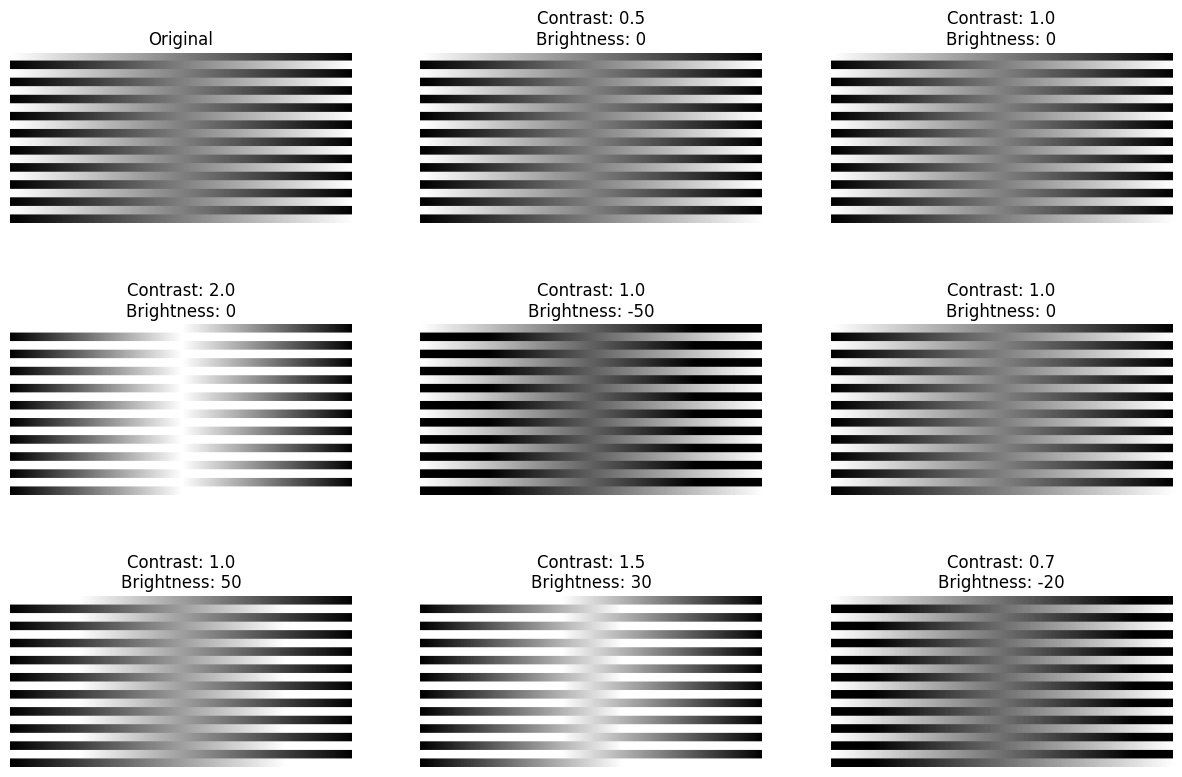

In [3]:
# Create and display demo
demo_image = create_demo_image()
show_adjustments(demo_image)
plt.show()
